In [93]:
import numpy as np
import sklearn

from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

import matplotlib.pyplot as plt

In [94]:
#Lakers = np.genfromtxt("data/LakersStats.txt",delimiter=None)
Lakers = np.genfromtxt("data/lakers.txt", delimiter=None)
#Celtics = np.genfromtxt("data/celtics2.txt",delimiter=None)
Optional = np.genfromtxt("data/Jazz2.txt",delimiter=None)

# Cutoff Laker data to before Jazz games
#----- Team 1
cutoff = -15
LakersOppDRtg = Lakers[:cutoff, 4]
LakersAvgDRtg = Lakers[:cutoff, 5].mean()
print(LakersAvgDRtg)
"""
LakerseFG = Lakers[:, 0]
LakersTOV = Lakers[:, 1]
LakersORB = Lakers[:, 2]
LakersFT  = Lakers[:, 3]
"""
"""
#----- Team 2
CelticsOppDRtg = Celtics[:, 4]
CelticsAvgDRtg = Celtics[:, 5].mean()
print(CelticsAvgDRtg)

CelticseFG = Celtics[:, 0]
CelticsTOV = Celtics[:, 1]
CelticsORB = Celtics[:, 2]
CelticsFT  = Celtics[:, 3]

"""
#----- Team 3
OptionalOppDRtg = Optional[:, 4]
#OptionalAvgDRtg = Optional[:, 5].mean()
#print(OptionalAvgDRtg)

OptionaleFG = Optional[:, 0]
OptionalTOV = Optional[:, 1]
OptionalORB = Optional[:, 2]
OptionalFT  = Optional[:, 3]
#"""

LOppDRtgtrn,LOppDRtgtst, LeFGtrn, LeFGtst = train_test_split(OptionalOppDRtg, OptionaleFG, test_size=0.25, shuffle=False)

lRegLeFG = LinearRegression().fit(LOppDRtgtrn.reshape(-1, 1), LeFGtrn)
xs = np.linspace(80,175,200)
xs = xs[ : , np.newaxis ]
ys = lRegLeFG.predict(xs)


104.61573033707866


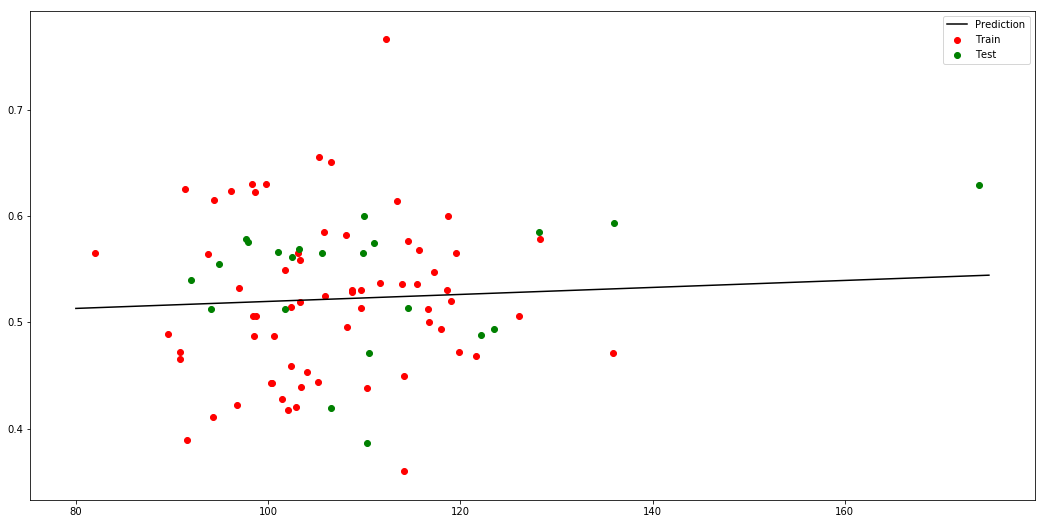

In [95]:
plt.rcParams['figure.figsize'] = (18.0, 9.0)
#plt.scatter(LakersOppDRtg, LakerseFG)
plt.scatter(LOppDRtgtrn, LeFGtrn, c='red', label='Train')
plt.scatter(LOppDRtgtst, LeFGtst, c='green', label='Test')
plt.plot(xs, ys, color='black', label='Prediction')

plt.legend()
plt.show()

In [96]:
def mse(y_pred, y):
    total = 0    
    for n in range(y.shape[0]):
        sub = y[n] - y_pred[n]
        sub = sub * sub
        total += sub    
    return (total / y.shape[0])

LeFGtrn_pred = lRegLeFG.predict(LOppDRtgtrn.reshape(-1,1))
LeFGtst_pred = lRegLeFG.predict(LOppDRtgtst.reshape(-1,1))

print("Train MSE: ", mse(LeFGtrn_pred, LeFGtrn))
print("Test MSE: ", mse(LeFGtst_pred, LeFGtst))

Train MSE:  0.005462194327134462
Test MSE:  0.003453261685006558


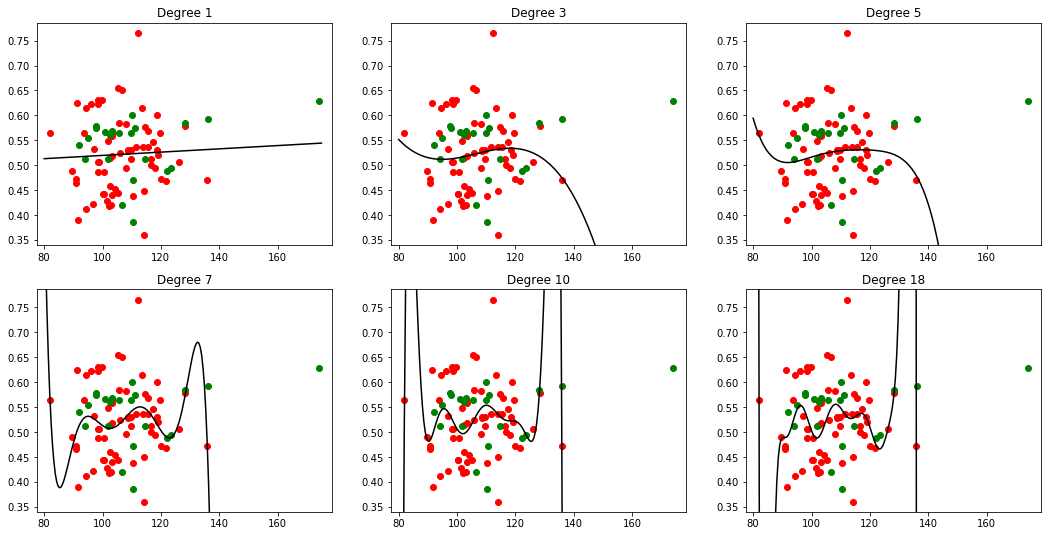

In [97]:
degrees = [1, 3, 5, 7, 10, 18]
#degrees = [1, 3, 5, 7, 9, 10, 13, 15, 18]

fig, ax = plt.subplots(2, 3)
#fig, ax = plt.subplots(3,3)
axFlat = [a for row in ax for a in row] # 2x3 subplot like a list

# Recording Error for Train and Test for the different Degrees for P1.3b
errLeFGTrain = []
errLeFGTest  = []

for i, d in enumerate(degrees):
    # Poly Expand on Train
    polyD = PolynomialFeatures(d, include_bias=False).fit(LOppDRtgtrn.reshape(-1,1))
    XtrnD = polyD.transform(LOppDRtgtrn.reshape(-1,1))

    scaler = StandardScaler().fit(XtrnD)
    XtrnD = scaler.transform(XtrnD)
    
    # Linear Regression on PolyExpanded/Scaled matrix
    lrPoly = LinearRegression().fit(XtrnD, LeFGtrn)
    
    # Poly Expand on Test
    XtstD = scaler.transform(polyD.transform(LOppDRtgtst.reshape(-1,1)))
    
    xsPoly = scaler.transform(polyD.transform(xs))
    ysPoly = lrPoly.predict(xsPoly)
    
    axFlat[i].plot(LOppDRtgtrn, LeFGtrn, 'ro', label='Train')
    axFlat[i].plot(LOppDRtgtst, LeFGtst, 'go', label='Test')
    axisSize = axFlat[i].axis()
    axFlat[i].plot(xs, ysPoly, color='black', label='Prediction')
    axFlat[i].axis(axisSize)
    axFlat[i].set_title("Degree %i" % d)
    
    YtrnPolyPred = lrPoly.predict(XtrnD)
    YtstPolyPred = lrPoly.predict(XtstD)
    
    errLeFGTrain.append(mse(YtrnPolyPred, LeFGtrn))
    errLeFGTest.append(mse(YtstPolyPred, LeFGtst))
    
plt.show()

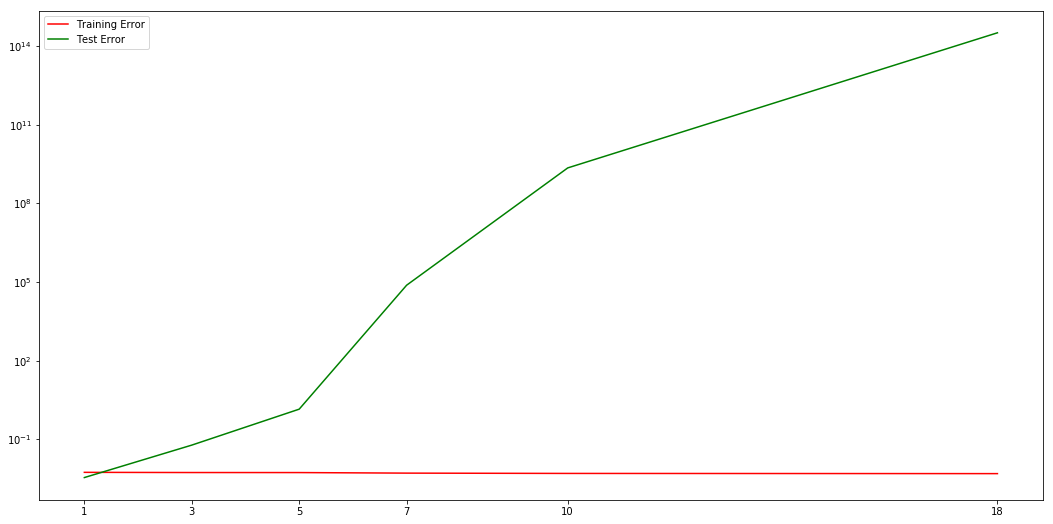

In [98]:
plt.semilogy(degrees, errLeFGTrain, color='red', label='Training Error')
plt.semilogy(degrees, errLeFGTest, color='green', label='Test Error')
plt.xticks(degrees)
plt.legend()
plt.show()

In [99]:
# Predicting Laker's eFG

# Choose Degree 10 I guess?
polyD = PolynomialFeatures(10, include_bias=False).fit(LOppDRtgtrn.reshape(-1,1))
XtrnD = polyD.transform(LOppDRtgtrn.reshape(-1,1))
scaler = StandardScaler().fit(XtrnD)
XtrnD = scaler.transform(XtrnD)

# Linear Regression on PolyExpanded/Scaled matrix
lrPolyTen = LinearRegression().fit(XtrnD, LeFGtrn)

fakeArray = np.array([LakersAvgDRtg])

xHat = scaler.transform(polyD.transform(fakeArray.reshape(-1,1)))
OptionaleFGHat = lrPolyTen.predict(xHat)
print(OptionaleFGHat)

[0.51151419]


# -----------------------------------------------------------------------------------------

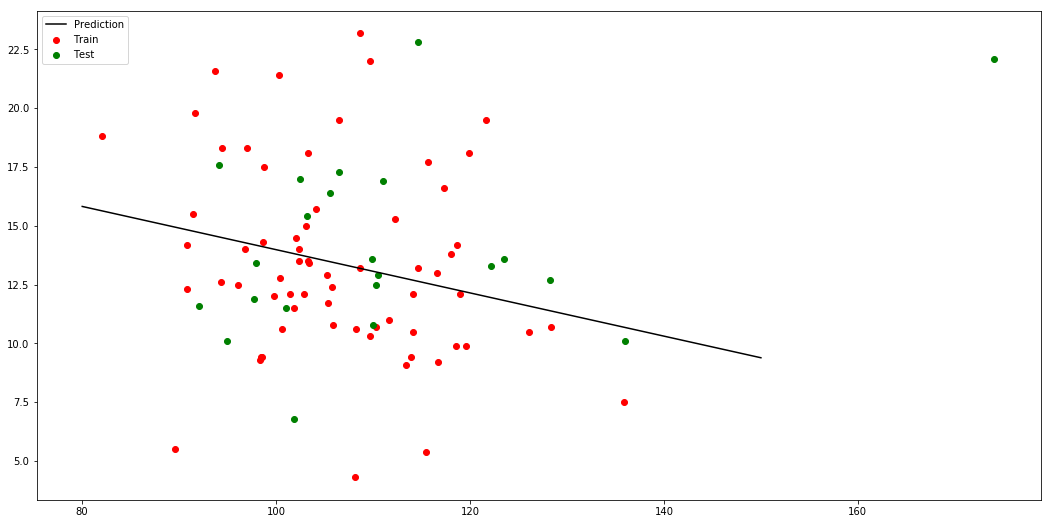

In [100]:
LOppDRtgtrn,LOppDRtgtst, LTOVtrn, LTOVtst = train_test_split(OptionalOppDRtg, OptionalTOV, test_size=0.25, shuffle=False)

lRegLTOV = LinearRegression().fit(LOppDRtgtrn.reshape(-1, 1), LTOVtrn)
xs = np.linspace(80,150,200)
xs = xs[ : , np.newaxis ]
ys = lRegLTOV.predict(xs)

plt.scatter(LOppDRtgtrn, LTOVtrn, c='red', label='Train')
plt.scatter(LOppDRtgtst, LTOVtst, c='green', label='Test')
plt.plot(xs, ys, color='black', label='Prediction')

plt.legend()
plt.show()


In [101]:
LTOVtrn_pred = lRegLTOV.predict(LOppDRtgtrn.reshape(-1,1))
LTOVtst_pred = lRegLTOV.predict(LOppDRtgtst.reshape(-1,1))

print("Train MSE: ", mse(LTOVtrn_pred, LTOVtrn))
print("Test MSE: ", mse(LTOVtst_pred, LTOVtst))

Train MSE:  15.196124083148062
Test MSE:  22.28329722064084


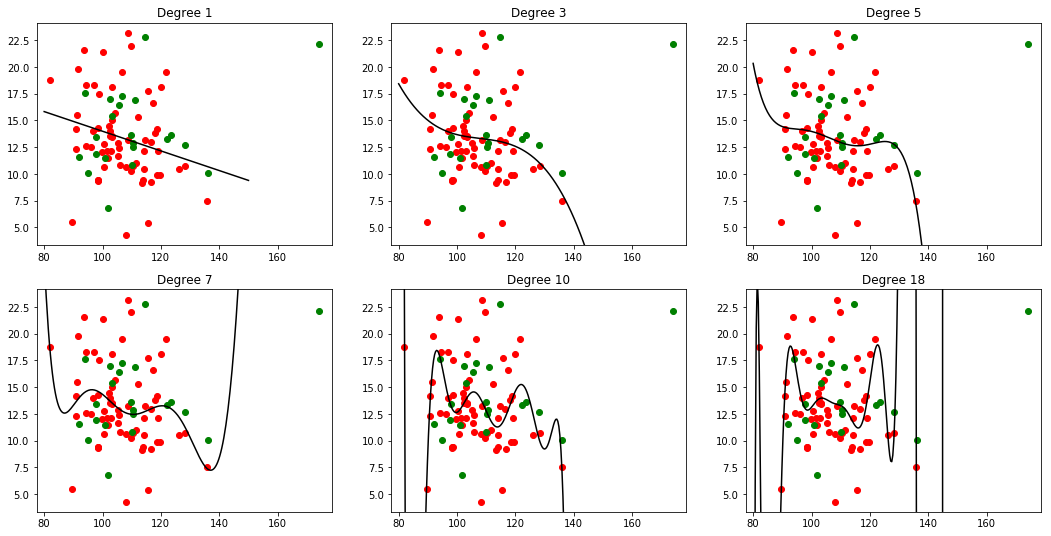

In [102]:
degrees = [1, 3, 5, 7, 10, 18]
#degrees = [1, 3, 5, 7, 9, 10, 13, 15, 18]

fig, ax = plt.subplots(2, 3)
#fig, ax = plt.subplots(3,3)
axFlat = [a for row in ax for a in row] # 2x3 subplot like a list

# Recording Error for Train and Test for the different Degrees for P1.3b
errLTOVTrain = []
errLTOVTest  = []

for i, d in enumerate(degrees):
    # Poly Expand on Train
    polyD = PolynomialFeatures(d, include_bias=False).fit(LOppDRtgtrn.reshape(-1,1))
    XtrnD = polyD.transform(LOppDRtgtrn.reshape(-1,1))

    scaler = StandardScaler().fit(XtrnD)
    XtrnD = scaler.transform(XtrnD)
    
    # Linear Regression on PolyExpanded/Scaled matrix
    lrPoly = LinearRegression().fit(XtrnD, LTOVtrn)
    
    # Poly Expand on Test
    XtstD = scaler.transform(polyD.transform(LOppDRtgtst.reshape(-1,1)))
    
    xsPoly = scaler.transform(polyD.transform(xs))
    ysPoly = lrPoly.predict(xsPoly)
    
    axFlat[i].plot(LOppDRtgtrn, LTOVtrn, 'ro', label='Train')
    axFlat[i].plot(LOppDRtgtst, LTOVtst, 'go', label='Test')
    axisSize = axFlat[i].axis()
    axFlat[i].plot(xs, ysPoly, color='black', label='Prediction')
    axFlat[i].axis(axisSize)
    axFlat[i].set_title("Degree %i" % d)
    
    YtrnPolyPred = lrPoly.predict(XtrnD)
    YtstPolyPred = lrPoly.predict(XtstD)
    
    errLTOVTrain.append(mse(YtrnPolyPred, LTOVtrn))
    errLTOVTest.append(mse(YtstPolyPred, LTOVtst))
    
plt.show()

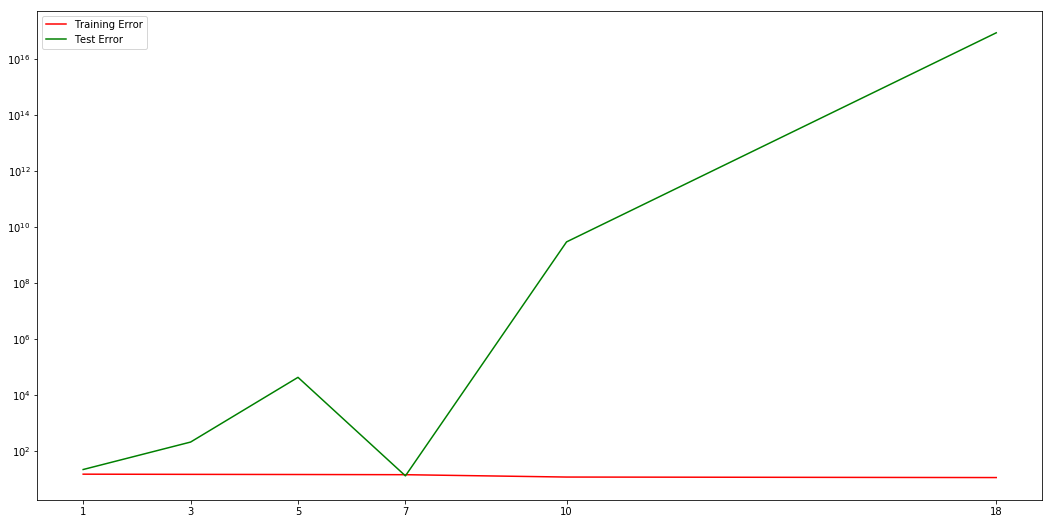

In [103]:
plt.semilogy(degrees, errLTOVTrain, color='red', label='Training Error')
plt.semilogy(degrees, errLTOVTest, color='green', label='Test Error')
plt.xticks(degrees)
plt.legend()
plt.show()

In [104]:
# Choose Degree 7 I guess?
polyD = PolynomialFeatures(7, include_bias=False).fit(LOppDRtgtrn.reshape(-1,1))
XtrnD = polyD.transform(LOppDRtgtrn.reshape(-1,1))
scaler = StandardScaler().fit(XtrnD)
XtrnD = scaler.transform(XtrnD)

# Linear Regression on PolyExpanded/Scaled matrix
lrPolySev = LinearRegression().fit(XtrnD, LTOVtrn)

fakeArray = np.array([LakersAvgDRtg])

xHat = scaler.transform(polyD.transform(fakeArray.reshape(-1,1)))
OptionalTOVHat = lrPolySev.predict(xHat)
print(OptionalTOVHat)

[13.19939782]


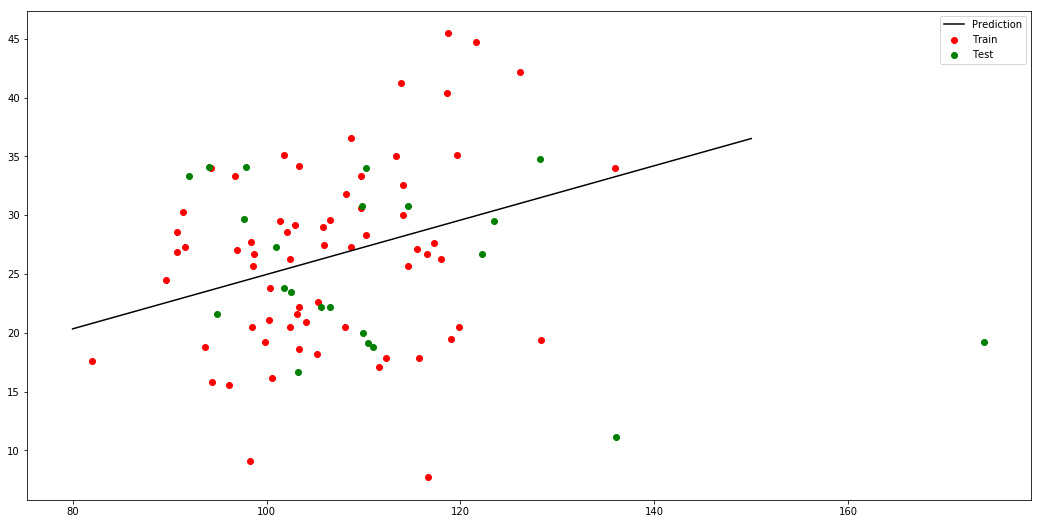

In [105]:
#plt.scatter(LakersOppDRtg, LakersORB)
#plt.show()

LOppDRtgtrn,LOppDRtgtst, LORBtrn, LORBtst = train_test_split(OptionalOppDRtg, OptionalORB, test_size=0.25, shuffle=False)

lRegLORB = LinearRegression().fit(LOppDRtgtrn.reshape(-1, 1), LORBtrn)
xs = np.linspace(80,150,200)
xs = xs[ : , np.newaxis ]
ys = lRegLORB.predict(xs)

plt.scatter(LOppDRtgtrn, LORBtrn, c='red', label='Train')
plt.scatter(LOppDRtgtst, LORBtst, c='green', label='Test')
plt.plot(xs, ys, color='black', label='Prediction')

plt.legend()
plt.show()


In [106]:
LORBtrn_pred = lRegLORB.predict(LOppDRtgtrn.reshape(-1,1))
LORBtst_pred = lRegLORB.predict(LOppDRtgtst.reshape(-1,1))

print("Train MSE: ", mse(LORBtrn_pred, LORBtrn))
print("Test MSE: " , mse(LORBtst_pred , LORBtst))

Train MSE:  55.286795232772526
Test MSE:  80.20395372531911


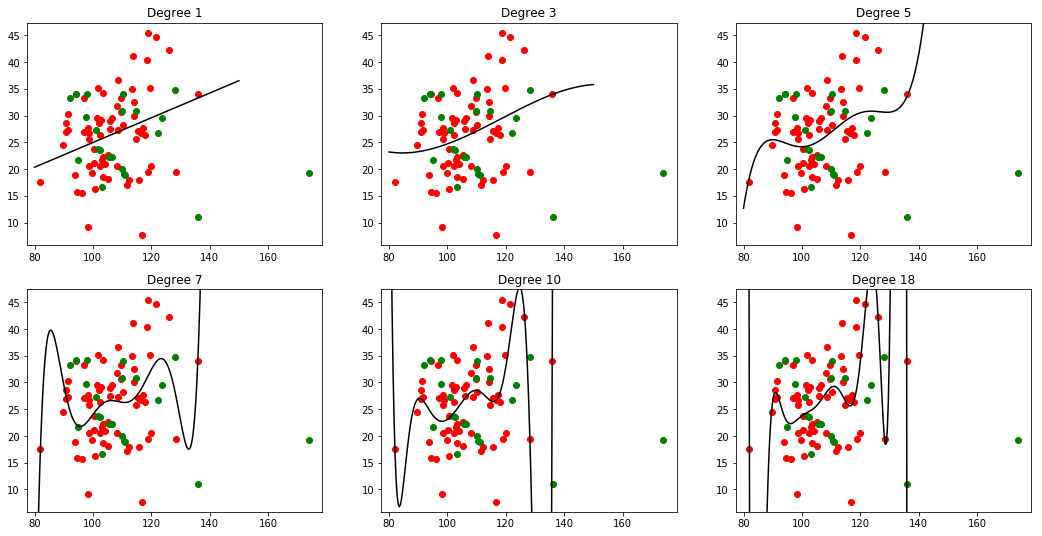

In [107]:
degrees = [1, 3, 5, 7, 10, 18]
#degrees = [1, 3, 5, 7, 9, 10, 13, 15, 18]

fig, ax = plt.subplots(2, 3)
#fig, ax = plt.subplots(3,3)
axFlat = [a for row in ax for a in row] # 2x3 subplot like a list

# Recording Error for Train and Test for the different Degrees for P1.3b
errLORBTrain = []
errLORBTest  = []

for i, d in enumerate(degrees):
    # Poly Expand on Train
    polyD = PolynomialFeatures(d, include_bias=False).fit(LOppDRtgtrn.reshape(-1,1))
    XtrnD = polyD.transform(LOppDRtgtrn.reshape(-1,1))

    scaler = StandardScaler().fit(XtrnD)
    XtrnD = scaler.transform(XtrnD)
    
    # Linear Regression on PolyExpanded/Scaled matrix
    lrPoly = LinearRegression().fit(XtrnD, LORBtrn)
    
    # Poly Expand on Test
    XtstD = scaler.transform(polyD.transform(LOppDRtgtst.reshape(-1,1)))
    
    xsPoly = scaler.transform(polyD.transform(xs))
    ysPoly = lrPoly.predict(xsPoly)
    
    axFlat[i].plot(LOppDRtgtrn, LORBtrn, 'ro', label='Train')
    axFlat[i].plot(LOppDRtgtst, LORBtst, 'go', label='Test')
    axisSize = axFlat[i].axis()
    axFlat[i].plot(xs, ysPoly, color='black', label='Prediction')
    axFlat[i].axis(axisSize)
    axFlat[i].set_title("Degree %i" % d)
    
    YtrnPolyPred = lrPoly.predict(XtrnD)
    YtstPolyPred = lrPoly.predict(XtstD)
    
    errLORBTrain.append(mse(YtrnPolyPred, LORBtrn))
    errLORBTest.append(mse(YtstPolyPred, LORBtst))
    
plt.show()

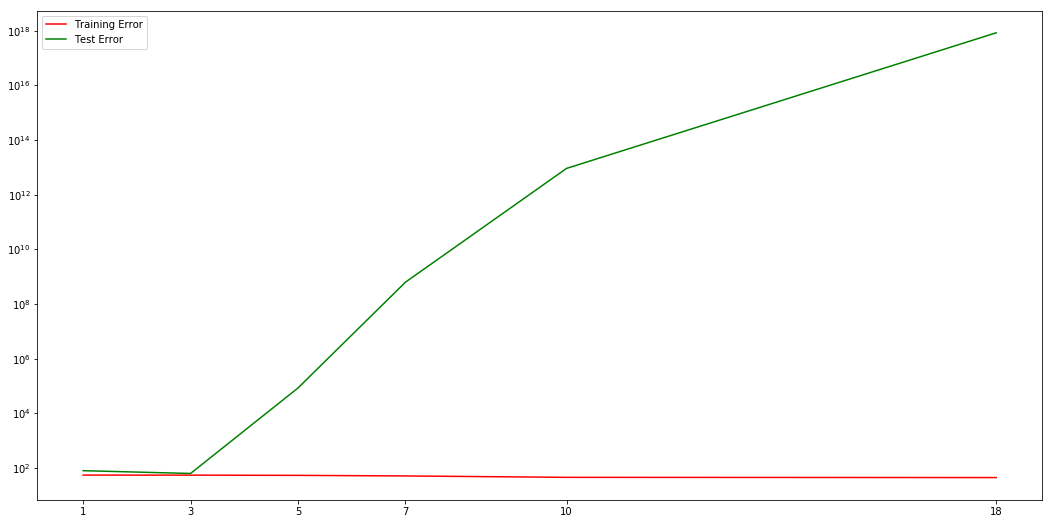

In [108]:
plt.semilogy(degrees, errLORBTrain, color='red', label='Training Error')
plt.semilogy(degrees, errLORBTest, color='green', label='Test Error')
plt.xticks(degrees)
plt.legend()
plt.show()

In [109]:
# Choose Degree 1 I guess?
polyD = PolynomialFeatures(1, include_bias=False).fit(LOppDRtgtrn.reshape(-1,1))
XtrnD = polyD.transform(LOppDRtgtrn.reshape(-1,1))
scaler = StandardScaler().fit(XtrnD)
XtrnD = scaler.transform(XtrnD)

# Linear Regression on PolyExpanded/Scaled matrix
lrPolyOne = LinearRegression().fit(XtrnD, LORBtrn)

fakeArray = np.array([LakersAvgDRtg])

xHat = scaler.transform(polyD.transform(fakeArray.reshape(-1,1)))
OptionalORBHat = lrPolyOne.predict(xHat)
print(OptionalORBHat)

[26.02682882]


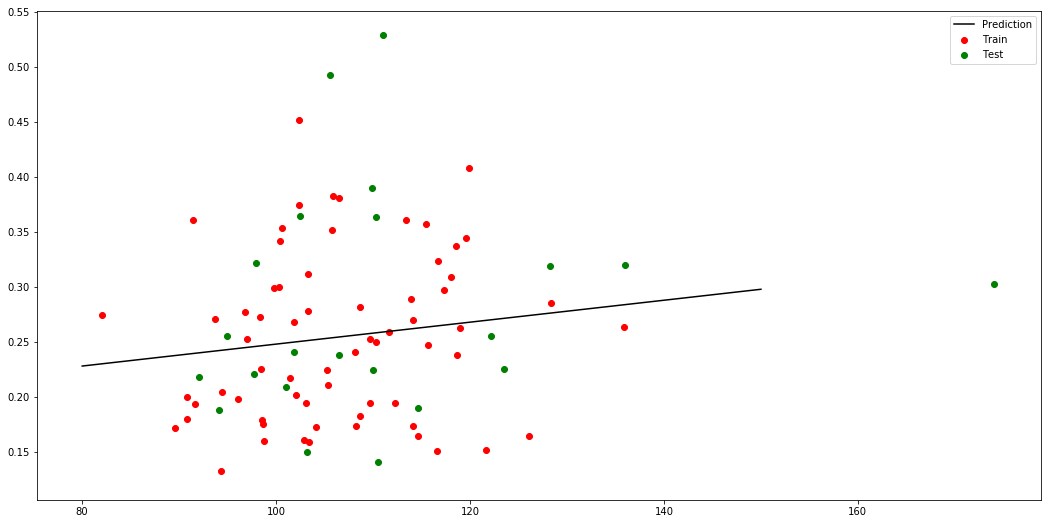

In [110]:
LOppDRtgtrn,LOppDRtgtst, LFTtrn, LFTtst = train_test_split(OptionalOppDRtg, OptionalFT, test_size=0.25, shuffle=False)

lRegLFT = LinearRegression().fit(LOppDRtgtrn.reshape(-1, 1), LFTtrn)
xs = np.linspace(80,150,200)
xs = xs[ : , np.newaxis ]
ys = lRegLFT.predict(xs)

plt.scatter(LOppDRtgtrn, LFTtrn, c='red', label='Train')
plt.scatter(LOppDRtgtst, LFTtst, c='green', label='Test')
plt.plot(xs, ys, color='black', label='Prediction')

plt.legend()
plt.show()

In [111]:
LFTtrn_pred = lRegLFT.predict(LOppDRtgtrn.reshape(-1,1))
LFTtst_pred = lRegLFT.predict(LOppDRtgtst.reshape(-1,1))

print("Train MSE: ", mse(LFTtrn_pred, LFTtrn))
print("Test MSE: " , mse(LFTtst_pred , LFTtst))

Train MSE:  0.005445416293886249
Test MSE:  0.009994740161362646


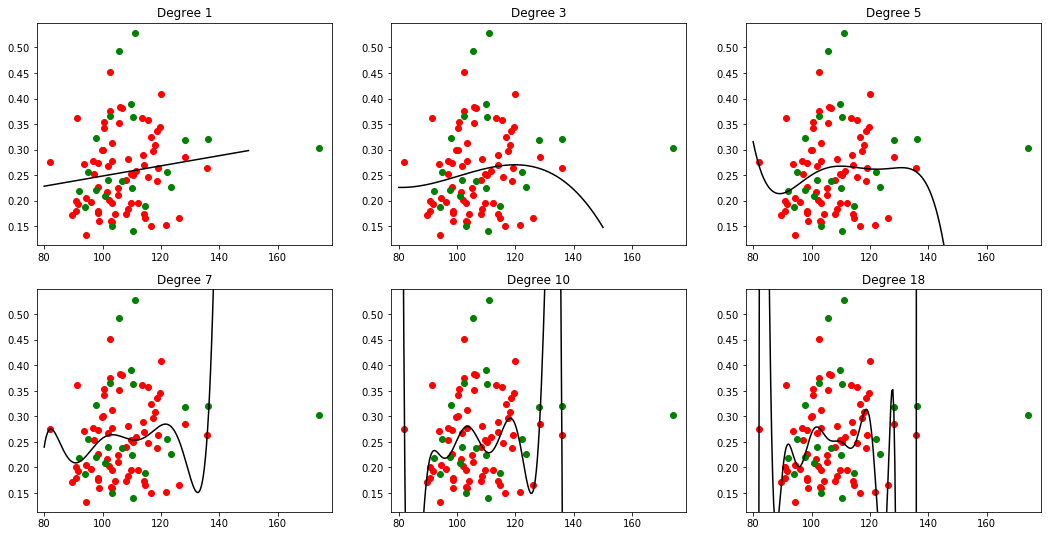

In [112]:
degrees = [1, 3, 5, 7, 10, 18]
#degrees = [1, 3, 5, 7, 9, 10, 13, 15, 18]

fig, ax = plt.subplots(2, 3)
#fig, ax = plt.subplots(3,3)
axFlat = [a for row in ax for a in row] # 2x3 subplot like a list

# Recording Error for Train and Test for the different Degrees for P1.3b
errLFTTrain = []
errLFTTest  = []

for i, d in enumerate(degrees):
    # Poly Expand on Train
    polyD = PolynomialFeatures(d, include_bias=False).fit(LOppDRtgtrn.reshape(-1,1))
    XtrnD = polyD.transform(LOppDRtgtrn.reshape(-1,1))

    scaler = StandardScaler().fit(XtrnD)
    XtrnD = scaler.transform(XtrnD)
    
    # Linear Regression on PolyExpanded/Scaled matrix
    lrPoly = LinearRegression().fit(XtrnD, LFTtrn)
    
    # Poly Expand on Test
    XtstD = scaler.transform(polyD.transform(LOppDRtgtst.reshape(-1,1)))
    
    xsPoly = scaler.transform(polyD.transform(xs))
    ysPoly = lrPoly.predict(xsPoly)
    
    axFlat[i].plot(LOppDRtgtrn, LFTtrn, 'ro', label='Train')
    axFlat[i].plot(LOppDRtgtst, LFTtst, 'go', label='Test')
    axisSize = axFlat[i].axis()
    axFlat[i].plot(xs, ysPoly, color='black', label='Prediction')
    axFlat[i].axis(axisSize)
    axFlat[i].set_title("Degree %i" % d)
    
    YtrnPolyPred = lrPoly.predict(XtrnD)
    YtstPolyPred = lrPoly.predict(XtstD)
    
    errLFTTrain.append(mse(YtrnPolyPred, LFTtrn))
    errLFTTest.append(mse(YtstPolyPred, LFTtst))
    
plt.show()

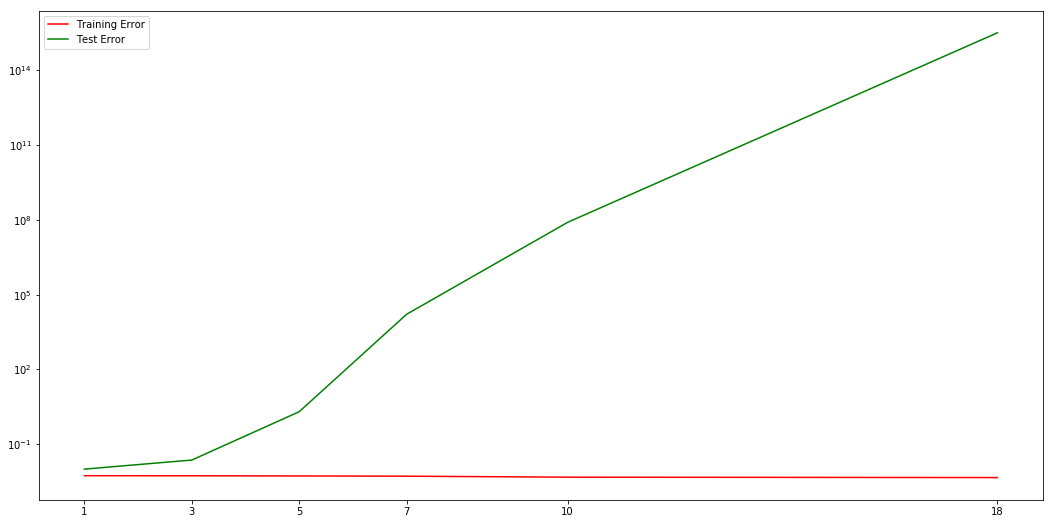

In [113]:
plt.semilogy(degrees, errLFTTrain, color='red', label='Training Error')
plt.semilogy(degrees, errLFTTest, color='green', label='Test Error')
plt.xticks(degrees)
plt.legend()
plt.show()

In [114]:
# Choose Degree 5 I guess?
polyD = PolynomialFeatures(5, include_bias=False).fit(LOppDRtgtrn.reshape(-1,1))
XtrnD = polyD.transform(LOppDRtgtrn.reshape(-1,1))
scaler = StandardScaler().fit(XtrnD)
XtrnD = scaler.transform(XtrnD)

# Linear Regression on PolyExpanded/Scaled matrix
lrPolyFiv = LinearRegression().fit(XtrnD, LFTtrn)

fakeArray = np.array([LakersAvgDRtg])

xHat = scaler.transform(polyD.transform(fakeArray.reshape(-1,1)))
OptionalFTHat = lrPolyFiv.predict(xHat)
print(OptionalFTHat)

[0.26292447]
